<a href="https://colab.research.google.com/github/felippedamasopy/Analysis-Exploration-Date---Py/blob/main/Remove_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/residencia (1).csv')
df

,Unnamed: 0,Unnamed: 0.1,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipos Agregado
0,0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,2,3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,3,4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,4,6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22577,22577,32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
22578,22578,32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
22579,22579,32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
22580,22580,32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


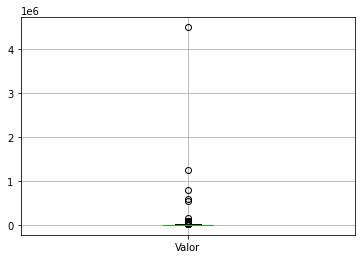

In [ ]:
df.boxplot(['Valor'])

In [ ]:
df[df['Valor'] >= 500000]

,Unnamed: 0,Unnamed: 0.1,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipos Agregado
7904,7904,11712,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11012,11012,16206,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
13110,13110,19256,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14331,14331,21024,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
16057,16057,23491,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [ ]:
valor = df['Valor']

In [ ]:
# TODO CALCULO BASEADO NOS QUARTIS DO BOXPLOT

In [ ]:
Q1 = valor.quantile(.25)

In [ ]:
Q3 = valor.quantile(.75 )

In [ ]:
IIQ = Q3 - Q1

In [ ]:
limite_inferior = Q1 - 1.5 * IIQ

In [ ]:
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [ ]:
dados_new = df[selecao]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff15de65190>]],
      dtype=object)

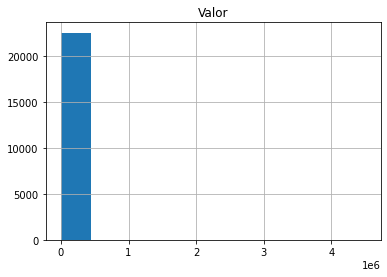

In [ ]:
df.hist(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff15dde4ad0>]],
      dtype=object)

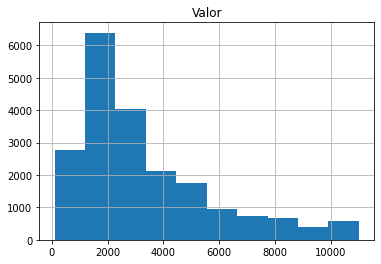

In [ ]:
dados_new.hist(['Valor'])

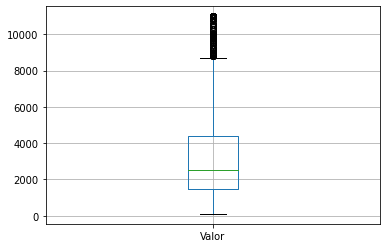

In [ ]:
dados_new.boxplot(['Valor'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


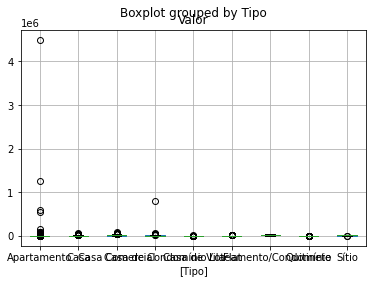

In [ ]:
df.boxplot(['Valor'], by = ['Tipo'])

In [ ]:
grupo_tipo = df.groupby('Tipo')

In [ ]:
grupo_tipo = df.groupby('Tipo')['Valor']

In [ ]:
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
limite_superior['Apartamento']

9950.0

In [ ]:
for tipo in grupo_tipo.groups.keys():
  print(tipo)

Apartamento
Casa
Casa Comercial
Casa de Condomínio
Casa de Vila
Flat
Loteamento/Condomínio
Quitinete
Sítio


In [ ]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = df['Tipo'] == tipo
    eh_dentro_limite = (df['Valor'] >= limite_inferior[tipo]) & (df['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    df[selecao]

In [ ]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = df['Tipo'] == tipo
    eh_dentro_limite = (df['Valor'] >= limite_inferior[tipo]) & (df['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = df[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


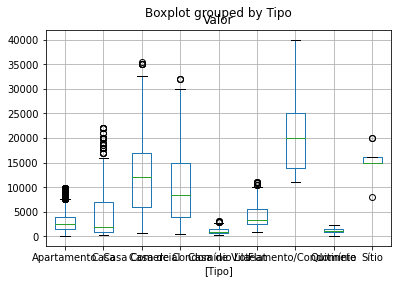

In [ ]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [ ]:
dados_new.to_csv('out.csv', sep = ';', index = False)